In [149]:
# 매출액 분포 나타내기
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic'

df = pd.read_excel('C:/Users/KEARNEY/Desktop/새 폴더/c_project/LDH/data/CJFW/CJFW_data_FO_매출액.xlsx')
df = df.set_index(np.array(range(len(df))))

In [150]:
df_= pd.read_excel('C:/Users/KEARNEY/Desktop/새 폴더/c_project/LDH/data/CJFW/CJFW_data_FO_업종.xlsx')
df_.columns=['세무상호', '영업상호','업종']
df_.head()

,세무상호,영업상호,업종
0,(주)코차이나유씨에스,(주)코차이나 유씨에스,기타
1,그동네떡볶이,그동네떡볶이 [09호_정진구],분식
2,노을에프앤비(F&B),노을에프앤비(F&B),식자재
3,(주)대화엠피,(주)대화엠피,기타
4,카이화(Kai 火),카이화,중식


# FO 양식 매장

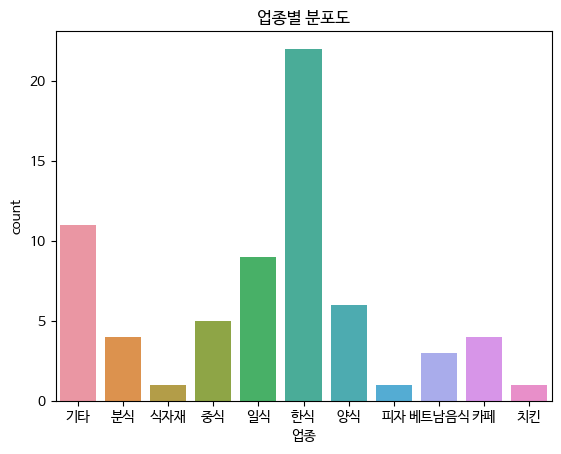

In [151]:
sns.countplot(x="업종", data=df_)
plt.title("업종별 분포도")
plt.show()

In [152]:
df_[df_['업종']=='양식'].count()

세무상호    6
영업상호    6
업종      6
dtype: int64

### FO 양식 6개뿐

In [153]:
west_df = df_[df_['업종']=='양식']
west_df

,세무상호,영업상호,업종
11,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식
14,이관우파스타,이관우파스타 30호_해다미(유현식),양식
37,에일크루(동교동점),■RS_에일크루(동교동점),양식
38,헤즈밀(연남),[폐업]■RS_헤즈밀(연남),양식
41,키노키친,■RS_키노키친,양식
61,RS_탑클라우드23,□RS_탑클라우드23,양식


In [176]:
fo_juso =  pd.read_excel('C:/Users/KEARNEY/Desktop/새 폴더/c_project/LDH/data/CJFW/CJFW_data_FO_주소.xlsx')
merge_fo_juso = pd.merge(west_df, fo_juso, on="영업상호")
merge_fo_juso

,세무상호_x,영업상호,업종,세무상호_y,주소
0,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식,미장플라쎄(MISE EN PLACE),"서울특별시 마포구 양화로19길 22-30,"
1,이관우파스타,이관우파스타 30호_해다미(유현식),양식,이관우파스타,"서울특별시 마포구 동교로46길 29,"
2,에일크루(동교동점),■RS_에일크루(동교동점),양식,에일크루(동교동점),서울특별시 마포구 와우산로37길 7 (동교동)
3,헤즈밀(연남),[폐업]■RS_헤즈밀(연남),양식,헤즈밀(연남),서울특별시 마포구 동교로46길 42-20 (연남동)
4,키노키친,■RS_키노키친,양식,키노키친,서울특별시 마포구 와우산로29길 9
5,RS_탑클라우드23,□RS_탑클라우드23,양식,RS_탑클라우드23,서울특별시 마포구 백범로 192 (공덕동)


## 양식점 별 매출 파악

In [172]:
df.head()
df.columns =['영업상호', '메뉴', '매출액', '매출총이익', '매출수량1', '매출수량2',
       '매출수량3']
df = df.dropna(subset="메뉴")
df= df.set_index(np.array(range(len(df))))

merge_west_df = pd.merge(west_df,df, on='영업상호')
merge_west_df.head()

,세무상호,영업상호,업종,메뉴,매출액,매출총이익,매출수량1,매출수량2,매출수량3
0,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식,마포식품 생메밀면(냉장 1.5Kg*12EA/BOX),9640,1723,1,1,NaN
1,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식,진미식품 춘장(실온 300g*30EA/BOX 미국),1456,279,1,NaN,NaN
2,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식,매기 치킨스탁(실온 액상 1.2Kg*6EA/BOX),50033,10207,3,NaN,2
3,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식,더미상품(과세),210509,36616,16,2,3
4,미장플라쎄(MISE EN PLACE),미장플라쎄 [09호_정진구],양식,더미상품(비과세),949930,167072,29,13,15


In [173]:
west_sell = merge_west_df.groupby('영업상호').sum()
west_sell

,매출액,매출총이익
영업상호,,
[폐업]■RS_헤즈밀(연남),1839108,478573
■RS_에일크루(동교동점),1798499,432664
■RS_키노키친,2127315,477353
□RS_탑클라우드23,4463803,1080650
미장플라쎄 [09호_정진구],3204405,600863
이관우파스타 30호_해다미(유현식),211709,44364


In [154]:
#양식에 대해 

# FW 양식점 파악

In [181]:
df_fw = pd.read_excel('C:/Users/KEARNEY/Desktop/새 폴더/c_project/LDH/data/CJFW/CJFW_data_FW_업종.xlsx')

In [182]:
df_fw.groupby('업종').count()

,세무상호
업종,
1801110731728,1
PC방,2
PC수리,1
기타,2
기타식료품외,1
기타식음료품외,4
"기타주점,포차",1
덮밥,1
도매,1


In [185]:
fw_west = df_fw[df_fw['업종']=='양식']
fw_west.columns = ['영업상호','업종']

df_fw_juso = pd.read_excel('C:/Users/KEARNEY/Desktop/새 폴더/c_project/LDH/data/CJFW/CJFW_data_FW_주소.xlsx')
df_fw_juso.columns=['영업상호','영업상호1','주소']
merge_fw_juso = pd.merge(fw_west, df_fw_juso, on="영업상호")

merge_fw_juso

,영업상호,업종,영업상호1,주소
0,쉬즈베이글(서교동),양식,쉬즈베이글(서교동),서울특별시 마포구 서교동 344-6 칼리오페
1,쉬즈베이글(마포점),양식,쉬즈베이글(마포점),서울 마포구 도화동 560
2,오더플러스 1989버거스탠드,양식,오더플러스 1989버거스탠드,서울 마포구 동교동 113-25
3,오더플러스 501 파스타,양식,오더플러스 501 파스타,서울 마포구 서교동 486
4,오더플러스 애프터모닝,양식,오더플러스 애프터모닝,서울 마포구 동교동 118-18
5,스푼필라프(홍대점),양식,스푼필라프(홍대점),서울 마포구 서교동 442-30
6,까르보네(마포성산점),양식,까르보네(마포성산점),서울특별시 마포구 성산제1동 245-15
7,에그벅(한신대점_베리타스드림),양식,에그벅(한신대점_베리타스드림),서울 마포구 공덕동 463
8,코키펍(홍대점),양식,코키펍(홍대점),서울특별시 마포구 서교동 364-2 태경빌딩
9,돼지게티(홍대점),양식,돼지게티(홍대점),서울 마포구 서교동 409-10


In [187]:
total_west = pd.concat([merge_fo_juso[['영업상호','주소']] ,merge_fw_juso[['영업상호','주소']]],axis=0)

In [205]:
total_west= total_west.set_index(np.array(range(len(total_west))))

In [189]:
total_west.head()

,영업상호,주소
0,미장플라쎄 [09호_정진구],"서울특별시 마포구 양화로19길 22-30,"
1,이관우파스타 30호_해다미(유현식),"서울특별시 마포구 동교로46길 29,"
2,■RS_에일크루(동교동점),서울특별시 마포구 와우산로37길 7 (동교동)
3,[폐업]■RS_헤즈밀(연남),서울특별시 마포구 동교로46길 42-20 (연남동)
4,■RS_키노키친,서울특별시 마포구 와우산로29길 9


In [206]:
import re

def remove_brackets(s):
    # 괄호와 괄호 안의 내용을 제거하는 정규표현식
    pattern = r'\([^)]*\)'

    # 문자열에서 정규표현식에 해당하는 부분을 모두 제거
    result = re.sub(pattern, '', s)

    # 특수문자를 제거하는 정규표현식
    pattern = r'[^\w\s-]'

    # 문자열에서 정규표현식에 해당하는 부분을 모두 제거
    result = re.sub(pattern, '', result)
    

    return result


In [207]:
total_west['주소'] = total_west['주소'].apply(remove_brackets)

In [208]:
total_west

,영업상호,주소
0,미장플라쎄 [09호_정진구],서울특별시 마포구 양화로19길 22-30
1,이관우파스타 30호_해다미(유현식),서울특별시 마포구 동교로46길 29
2,■RS_에일크루(동교동점),서울특별시 마포구 와우산로37길 7
3,[폐업]■RS_헤즈밀(연남),서울특별시 마포구 동교로46길 42-20
4,■RS_키노키친,서울특별시 마포구 와우산로29길 9
5,□RS_탑클라우드23,서울특별시 마포구 백범로 192
6,쉬즈베이글(서교동),서울특별시 마포구 서교동 344-6 칼리오페
7,쉬즈베이글(마포점),서울 마포구 도화동 560
8,오더플러스 1989버거스탠드,서울 마포구 동교동 113-25
9,오더플러스 501 파스타,서울 마포구 서교동 486


In [224]:
total_west.loc[6,'주소'] = '서울특별시 마포구 서교동 344-6'
total_west.loc[12,'주소'] = '서울특별시 마포구 성산동 245-15'
total_west.loc[14,'주소'] = '서울특별시 마포구 서교동 364-2'

In [225]:
address_lat('서울특별시 마포구 성산동 245-15')

서울특별시 마포구 성산동 245-15


37.56775

# 양식 업체들 위치 지도

In [243]:
#주소 -> 위도 경도 변환
from geopy.geocoders import Nominatim
import pandas as pd
import plotly.express as px

def address_lat(address):
    #print(address)
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    idx = address.find('(')
    
    address = address[:idx-1]
    
    geo = geolocoder.geocode(address)
    #crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}
    
    lat = geo.latitude
    
    return lat

def address_lng(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    idx = address.find('(')
    
    address = address[:idx-1]
    
    geo = geolocoder.geocode(address)
    #crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}
    
    lng = geo.longitude
    

    return lng

#그림 그리기
def plotly_ploting(df):
    
    

    lat =df['주소'].apply(address_lat)
    lng =df['주소'].apply(address_lng)

    df['lat']=lat
    df['lng']=lng
    
    fig = px.scatter_mapbox(df, lat='lat', lon='lng', hover_name='영업상호')
    fig.update_layout(mapbox_style = "open-street-map")
    fig.show()
    
    


In [244]:
ploted_map = plotly_ploting(total_west)

In [ ]:
ploted_map

# 매출 규모 파악

# 매출액과 매출 이익 분포

In [110]:
sell_df = df.groupby(by='영업상호').sum()
sell_df

,매출액,매출총이익
영업상호,,
(HR)미스사이공(신촌역),7759351,1515391
(HR)미스포(마포구청),13923073,2644677
(HR)포메인 레드(RED) 상암점,6444315,1203164
(HR)포몬스(홍대점),4846487,1002796
(마포공덕역)청춘꼬마김밥앤떡볶이,3589908,762578
...,...,...
이관우파스타 30호_해다미(유현식),211709,44364
좋은맛 공덕점 [09호_정진구],4043541,663653
지후식당 [09호_정진구],2629530,676909


Text(0.5, 1.0, '매출액 분포도(단위:100만원)')

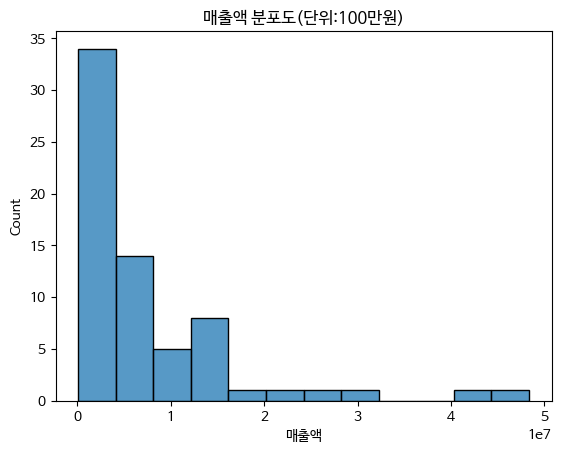

In [111]:
x = sell_df['매출액']
sns.histplot(x)
plt.title("매출액 분포도(단위:100만원)")

Text(0.5, 1.0, '매출 총이익 분포도(단위:10만원)')

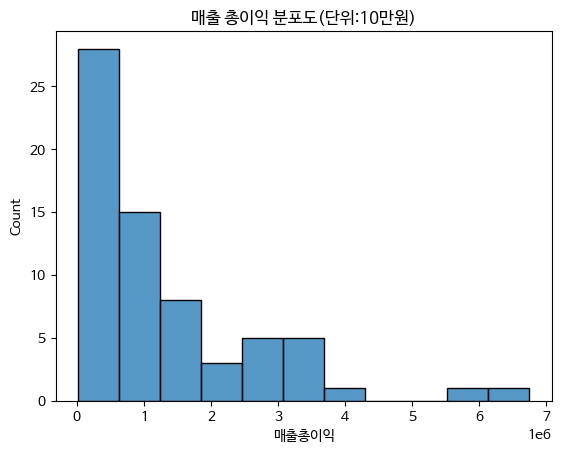

In [112]:
x2 = sell_df['매출총이익']
sns.histplot(x2)
plt.title("매출 총이익 분포도(단위:10만원)")

# 3달 중 몇번 시켰는지 분포

In [113]:
df = df.fillna(0)

In [114]:
df.head()

,영업상호,메뉴,매출액,매출총이익,매출수량1,매출수량2,매출수량3
0,(주)코차이나 유씨에스,청정원 돼지갈비양념(실온 10Kg/EA),288000,33823,0.0,0.0,10.0
1,(주)코차이나 유씨에스,새부산 사각어묵(냉동 상천_평 900g*20EA/BOX),5636,655,0.0,0.0,2.0
2,그동네떡볶이 [09호_정진구],동원F&B 빵가루(실온 1Kg*8EA/BOX),17738,2910,2.0,1.0,2.0
3,그동네떡볶이 [09호_정진구],곰표 튀김가루(실온 1Kg*10EA/BOX 미국),404426,62829,84.0,78.0,66.0
4,그동네떡볶이 [09호_정진구],사조해표 마요네즈(실온 스파우트팩 3.2Kg*4EA/BOX),329109,45424,9.0,12.0,8.0
